In [1]:
# %matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Fisher_Forecaster import Fisher_Forecaster
import pyccl as ccl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
h = 0.72
h3 = h**3

# Cosmosis P(k)

In [3]:
cosmosis_lin_pk = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis_matter_power_lin/p_k.txt")/h3
cosmosis_lin_z = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis_matter_power_lin/z.txt")
cosmosis_lin_k = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis_matter_power_lin/k_h.txt")*h

In [4]:
a = 1/(1+cosmosis_lin_z) # convert to scale factor

In [5]:
cosmosis_nl_pk = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis_matter_power_nl/p_k.txt")/h3
cosmosis_nl_z = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis_matter_power_nl/z.txt")
cosmosis_nl_k = np.loadtxt("ccl_cosmosis_pk_comparison/cosmosis_matter_power_nl/k_h.txt")*h

In [6]:
a_nl = 1/(1+cosmosis_nl_z)

# CCL P(k)

In [7]:
probe = "lensing"
bin_type = "equal_size"
nbins = 5
deriv_order = 2
derivs_to_calc = "all"
use_binned = True

In [8]:
F = Fisher_Forecaster(probe, bin_type, nbins, deriv_order, derivs_to_calc, use_binned=use_binned)

In [9]:
ccl_lin_pk = np.zeros(cosmosis_lin_pk.shape)
for i in range(len(a)):
    ccl_lin_pk[i] = ccl.linear_matter_power(F.cosmo, cosmosis_lin_k, a[i])

In [10]:
ccl_nl_pk = np.zeros(cosmosis_nl_pk.shape)
for i in range(len(a_nl)):
    ccl_nl_pk[i] = ccl.nonlin_matter_power(F.cosmo, cosmosis_nl_k, a_nl[i])

From CCL docs:

transfer function:
‘boltzmann_camb’: use CAMB to compute the transfer function (default)

matter power spectrum options
‘halofit’: use HALOFIT (default)


For Cosmosis, I am using boltzmann CAMB and halofit as well; perhaps the options supplied to both by default are different between the two

# Plots

### Setup Dataframes

In [11]:
df_cosmosis_lin_pk = pd.DataFrame(cosmosis_lin_pk, index=cosmosis_lin_z)
df_cosmosis_lin_pk.index.names = ["z"]
df_cosmosis_lin_pk.columns.names = [r'$k (Mpc^{-1})$']
df_cosmosis_lin_pk.rename(columns={i: cosmosis_lin_k[i] for i in range(len(cosmosis_lin_k))}, inplace=True)
df_cosmosis_lin_pk = df_cosmosis_lin_pk.T

In [12]:
df_ccl_lin_pk = pd.DataFrame(ccl_lin_pk, index=cosmosis_lin_z)
df_ccl_lin_pk.index.names = ["z"]
df_ccl_lin_pk.columns.names = [r'$k (Mpc^{-1})$']
df_ccl_lin_pk.rename(columns={i: cosmosis_lin_k[i] for i in range(len(cosmosis_lin_k))}, inplace=True)
df_ccl_lin_pk = df_ccl_lin_pk.T

In [13]:
df_cosmosis_nl_pk = pd.DataFrame(cosmosis_nl_pk, index=cosmosis_nl_z)
df_cosmosis_nl_pk.index.names = ["z"]
df_cosmosis_nl_pk.columns.names = [r'$k (Mpc^{-1})$']
df_cosmosis_nl_pk.rename(columns={i: cosmosis_nl_k[i] for i in range(len(cosmosis_nl_k))}, inplace=True)
df_cosmosis_nl_pk = df_cosmosis_nl_pk.T

In [14]:
df_ccl_nl_pk = pd.DataFrame(ccl_nl_pk, index=cosmosis_nl_z)
df_ccl_nl_pk.index.names = ["z"]
df_ccl_nl_pk.columns.names = [r'$k (Mpc^{-1})$']
df_ccl_nl_pk.rename(columns={i: cosmosis_nl_k[i] for i in range(len(cosmosis_nl_k))}, inplace=True)
df_ccl_nl_pk = df_ccl_nl_pk.T

### Linear P(k)

In [22]:
fig, ax1 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
@interact(idx=(1, len(cosmosis_lin_z)))
def plot_rel_diff(idx):
    ax1.clear()
    ((df_cosmosis_lin_pk.iloc[:,idx-1:idx] - df_ccl_lin_pk.iloc[:, idx-1:idx])/\
     df_ccl_lin_pk.iloc[:, idx-1:idx]).plot(ax=ax1, logx=True)
    plt.title("Linear P(k) Relative Difference, fixed z")
    fig.subplots_adjust(bottom=0.13)
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=51, description='idx', max=101, min=1), Output()), _dom_classes=('widget…

In [23]:
fig, ax2 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
((df_cosmosis_lin_pk - df_ccl_lin_pk)/df_ccl_lin_pk)\
    .plot(alpha=0.01, legend=False, color="black", logx=True, ax=ax2)
plt.title("Linear P(k) Relative Difference, all z's")
fig.subplots_adjust(bottom=0.13)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
fig, ax3 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
@interact(idx=(1, len(cosmosis_lin_z)))
def plot_both(idx):
    ax3.clear()
    df_cosmosis_lin_pk.iloc[:,idx-1:idx].plot(ax=ax3, loglog=True)
    df_ccl_lin_pk.iloc[:, idx-1:idx].plot(ax=ax3, loglog=True)
    plt.title("Linear P(k) Both CCL and COSMOSIS, fixed z")
    plt.ylabel(r'$P(k) (Mpc^3)$')
    fig.subplots_adjust(bottom=0.13)
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=51, description='idx', max=101, min=1), Output()), _dom_classes=('widget…

### Nonlinear P(k)

In [25]:
fig, ax4 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
@interact(idx=(1, len(cosmosis_nl_z)))
def plot_rel_diff(idx):
    ax4.clear()
    ((df_cosmosis_nl_pk.iloc[:,idx-1:idx] - df_ccl_nl_pk.iloc[:, idx-1:idx])/\
     df_ccl_nl_pk.iloc[:, idx-1:idx]).plot(ax=ax4, logx=True)
    plt.title("Non Linear P(k) Relative Difference, fixed z")
    fig.subplots_adjust(bottom=0.13)
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=51, description='idx', max=101, min=1), Output()), _dom_classes=('widget…

In [26]:
fig, ax5 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
((df_cosmosis_nl_pk - df_ccl_nl_pk)/df_ccl_nl_pk)\
    .plot(alpha=0.01, legend=False, color="black", logx=True, ax=ax5)
plt.title("Non Linear P(k) Relative Difference, all z's")
fig.subplots_adjust(bottom=0.13)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [27]:
fig, ax6 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
@interact(idx=(1, len(cosmosis_lin_z)))
def plot_both(idx):
    ax6.clear()
    df_cosmosis_nl_pk.iloc[:,idx-1:idx].plot(ax=ax6, loglog=True)
    df_ccl_nl_pk.iloc[:, idx-1:idx].plot(ax=ax6, loglog=True)
    plt.title("Non Linear P(k) Both CCL and COSMOSIS, fixed z")
    plt.ylabel(r'$P(k) (Mpc^3)$')
    fig.subplots_adjust(bottom=0.13)
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=51, description='idx', max=101, min=1), Output()), _dom_classes=('widget…

# Without extrapolate power

In [21]:
cosmosis_lin_pk_no_ep = np.loadtxt(".parameters/matter_power_lin/p_k.txt")/h3
cosmosis_nl_pk_no_ep  = np.loadtxt(".parameters/matter_power_nl/p_k.txt")/h3
cosmosis_lin_z_no_ep  = np.loadtxt(".parameters/matter_power_lin/z.txt")
cosmosis_lin_k_no_ep  = np.loadtxt(".parameters/matter_power_lin/k_h.txt")*h

OSError: .parameters/matter_power_lin/p_k.txt not found.

In [ ]:
df_cosmosis_lin_pk_no_ep = pd.DataFrame(cosmosis_lin_pk_no_ep, index=cosmosis_lin_z_no_ep)
df_cosmosis_lin_pk_no_ep.index.names = ["z"]
df_cosmosis_lin_pk_no_ep.columns.names = [r'$k (Mpc^{-1})$']
df_cosmosis_lin_pk_no_ep.rename(columns={i: cosmosis_lin_k_no_ep[i] for i in range(len(cosmosis_lin_k_no_ep))}, inplace=True)
df_cosmosis_lin_pk_no_ep = df_cosmosis_lin_pk_no_ep.T

In [ ]:
fig, ax7 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
@interact(idx=(1, len(cosmosis_lin_z)))
def plot_both(idx):
    ax7.clear()
    df_cosmosis_lin_pk_no_ep.iloc[:,idx-1:idx].plot(ax=ax7, loglog=True, linestyle="--")
    df_cosmosis_lin_pk.iloc[:, idx-1:idx].plot(ax=ax7, loglog=True, alpha=0.65)
    plt.title("Linear P(k) COSMOSIS, fixed z")
    plt.ylabel(r'$P(k) (Mpc^3)$')
    fig.subplots_adjust(bottom=0.13)
    plt.show()

In [ ]:
ks = df_cosmosis_lin_pk.index

In [ ]:
interped = []
for i in range(len(df_cosmosis_lin_pk_no_ep.values[0])):
    interped.append(np.interp(ks, df_cosmosis_lin_pk_no_ep.index, df_cosmosis_lin_pk_no_ep.values[:, i]))
interped = np.asarray(interped)
interped = interped.T

In [ ]:
df_cosmosis_lin_pk_no_ep_interped = pd.DataFrame(interped)
df_cosmosis_lin_pk_interped = pd.DataFrame(df_cosmosis_lin_pk.values)

In [ ]:
df_cosmosis_lin_pk_no_ep_interped.head()

In [ ]:
df_cosmosis_lin_pk_interped.head()

In [ ]:
fig, ax8 = plt.subplots(figsize=(6,9))
fig.canvas.layout.width = '80%'
fig.canvas.layout.height = '450px'
((df_cosmosis_lin_pk_no_ep_interped.iloc[:-200, :] - df_cosmosis_lin_pk_interped.iloc[:-200, :])/df_cosmosis_lin_pk_no_ep_interped.iloc[:-200, :])\
    .plot(alpha=0.01, legend=False, color="black", logx=True, ax=ax8)
plt.title("Linear P(k) Relative Difference Extrapolate Power, all z's")
fig.subplots_adjust(bottom=0.13)
plt.show()

# New comparison

## Cosmosis P(k) no extrapolate power

In [3]:
root_dir = "ccl_cosmosis_binned_comparison/out_cosmosis_no_extrapolate_power/.parameters/"
cosmosis_no_ep_lin_pk = np.loadtxt(root_dir+"matter_power_lin/p_k.txt")/h3
cosmosis_no_ep_lin_z = np.loadtxt(root_dir+"matter_power_lin/z.txt")
cosmosis_no_ep_lin_k = np.loadtxt(root_dir+"matter_power_lin/k_h.txt")*h

In [4]:
a_no_ep = 1/(1+cosmosis_no_ep_lin_z) # convert to scale factor

In [5]:
cosmosis_no_ep_nl_pk = np.loadtxt(root_dir+"matter_power_nl/p_k.txt")/h3
cosmosis_no_ep_nl_z = np.loadtxt(root_dir+"matter_power_nl/z.txt")
cosmosis_no_ep_nl_k = np.loadtxt(root_dir+"matter_power_nl/k_h.txt")*h

In [6]:
a_nl_no_ep = 1/(1+cosmosis_no_ep_nl_z)

## Cosmosis P(k) with extrapolate power

In [7]:
root_dir = "ccl_cosmosis_binned_comparison/out_cosmosis_extrapolate_power/.parameters/"
cosmosis_ep_lin_pk = np.loadtxt(root_dir+"matter_power_lin/p_k.txt")/h3
cosmosis_ep_lin_z = np.loadtxt(root_dir+"matter_power_lin/z.txt")
cosmosis_ep_lin_k = np.loadtxt(root_dir+"matter_power_lin/k_h.txt")*h

In [8]:
a_ep = 1/(1+cosmosis_ep_lin_z) # convert to scale factor

In [9]:
cosmosis_ep_nl_pk = np.loadtxt(root_dir+"matter_power_nl/p_k.txt")/h3
cosmosis_ep_nl_z = np.loadtxt(root_dir+"matter_power_nl/z.txt")
cosmosis_ep_nl_k = np.loadtxt(root_dir+"matter_power_nl/k_h.txt")*h

In [10]:
a_nl_ep = 1/(1+cosmosis_ep_nl_z)

# CCL P(k)

In [11]:
probe = "lensing"
bin_type = "equal_size"
nbins = 5
deriv_order = 2
derivs_to_calc = "all"
use_binned = True

In [13]:
F = Fisher_Forecaster(probe, bin_type, nbins, deriv_order, derivs_to_calc, use_binned=use_binned)

In [14]:
ccl_no_ep_lin_pk = np.zeros(cosmosis_no_ep_lin_pk.shape)
for i in range(len(a_no_ep)):
    ccl_no_ep_lin_pk[i] = ccl.linear_matter_power(F.cosmo, cosmosis_no_ep_lin_k, a_no_ep[i])

In [15]:
ccl_no_ep_nl_pk = np.zeros(cosmosis_no_ep_nl_pk.shape)
for i in range(len(a_nl_no_ep)):
    ccl_no_ep_nl_pk[i] = ccl.nonlin_matter_power(F.cosmo, cosmosis_no_ep_nl_k, a_nl_no_ep[i])

In [16]:
ccl_ep_lin_pk = np.zeros(cosmosis_ep_lin_pk.shape)
for i in range(len(a_ep)):
    ccl_ep_lin_pk[i] = ccl.linear_matter_power(F.cosmo, cosmosis_ep_lin_k, a_ep[i])

In [17]:
ccl_ep_nl_pk = np.zeros(cosmosis_ep_nl_pk.shape)
for i in range(len(a_nl_ep)):
    ccl_ep_nl_pk[i] = ccl.nonlin_matter_power(F.cosmo, cosmosis_ep_nl_k, a_nl_ep[i])

In [18]:
np.savetxt("ccl_cosmosis_binned_comparison/out_ccl/pk_nl.dat", ccl_ep_nl_pk)
np.savetxt("ccl_cosmosis_binned_comparison/out_ccl/k.dat", cosmosis_ep_nl_k)
np.savetxt("ccl_cosmosis_binned_comparison/out_ccl/a.dat", a_nl_ep)

## Plots

### Setup Dataframes

In [49]:
df_cosmosis_no_ep_lin_pk = pd.DataFrame(cosmosis_no_ep_lin_pk, index=cosmosis_no_ep_lin_z)
df_cosmosis_no_ep_lin_pk.index.names = ["z"]
df_cosmosis_no_ep_lin_pk.columns.names = [r'$k (Mpc^{-1})$']
df_cosmosis_no_ep_lin_pk.rename(columns={i: cosmosis_no_ep_lin_k[i] for i in range(len(cosmosis_no_ep_lin_k))}, inplace=True)
df_cosmosis_no_ep_lin_pk = df_cosmosis_no_ep_lin_pk.T

In [50]:
df_cosmosis_ep_lin_pk = pd.DataFrame(cosmosis_ep_lin_pk, index=cosmosis_ep_lin_z)
df_cosmosis_ep_lin_pk.index.names = ["z"]
df_cosmosis_ep_lin_pk.columns.names = [r'$k (Mpc^{-1})$']
df_cosmosis_ep_lin_pk.rename(columns={i: cosmosis_ep_lin_k[i] for i in range(len(cosmosis_ep_lin_k))}, inplace=True)
df_cosmosis_ep_lin_pk = df_cosmosis_ep_lin_pk.T

In [51]:
df_ccl_no_ep_lin_pk = pd.DataFrame(ccl_no_ep_lin_pk, index=cosmosis_no_ep_lin_z)
df_ccl_no_ep_lin_pk.index.names = ["z"]
df_ccl_no_ep_lin_pk.columns.names = [r'$k (Mpc^{-1})$']
df_ccl_no_ep_lin_pk.rename(columns={i: cosmosis_no_ep_lin_k[i] for i in range(len(cosmosis_no_ep_lin_k))}, inplace=True)
df_ccl_no_ep_lin_pk = df_ccl_no_ep_lin_pk.T

In [52]:
df_ccl_ep_lin_pk = pd.DataFrame(ccl_ep_lin_pk, index=cosmosis_ep_lin_z)
df_ccl_ep_lin_pk.index.names = ["z"]
df_ccl_ep_lin_pk.columns.names = [r'$k (Mpc^{-1})$']
df_ccl_ep_lin_pk.rename(columns={i: cosmosis_ep_lin_k[i] for i in range(len(cosmosis_ep_lin_k))}, inplace=True)
df_ccl_ep_lin_pk = df_ccl_ep_lin_pk.T

In [53]:
df_cosmosis_no_ep_nl_pk = pd.DataFrame(cosmosis_no_ep_nl_pk, index=cosmosis_no_ep_nl_z)
df_cosmosis_no_ep_nl_pk.index.names = ["z"]
df_cosmosis_no_ep_nl_pk.columns.names = [r'$k (Mpc^{-1})$']
df_cosmosis_no_ep_nl_pk.rename(columns={i: cosmosis_no_ep_nl_k[i] for i in range(len(cosmosis_no_ep_nl_k))}, inplace=True)
df_cosmosis_no_ep_nl_pk = df_cosmosis_no_ep_nl_pk.T

In [54]:
df_cosmosis_ep_nl_pk = pd.DataFrame(cosmosis_ep_nl_pk, index=cosmosis_ep_nl_z)
df_cosmosis_ep_nl_pk.index.names = ["z"]
df_cosmosis_ep_nl_pk.columns.names = [r'$k (Mpc^{-1})$']
df_cosmosis_ep_nl_pk.rename(columns={i: cosmosis_ep_nl_k[i] for i in range(len(cosmosis_ep_nl_k))}, inplace=True)
df_cosmosis_ep_nl_pk = df_cosmosis_ep_nl_pk.T

In [55]:
df_ccl_no_ep_nl_pk = pd.DataFrame(ccl_no_ep_nl_pk, index=cosmosis_no_ep_nl_z)
df_ccl_no_ep_nl_pk.index.names = ["z"]
df_ccl_no_ep_nl_pk.columns.names = [r'$k (Mpc^{-1})$']
df_ccl_no_ep_nl_pk.rename(columns={i: cosmosis_no_ep_nl_k[i] for i in range(len(cosmosis_no_ep_nl_k))}, inplace=True)
df_ccl_no_ep_nl_pk = df_ccl_no_ep_nl_pk.T

In [24]:
df_ccl_ep_nl_pk = pd.DataFrame(ccl_ep_nl_pk, index=cosmosis_ep_nl_z)
df_ccl_ep_nl_pk.index.names = ["z"]
df_ccl_ep_nl_pk.columns.names = [r'$k (Mpc^{-1})$']
df_ccl_ep_nl_pk.rename(columns={i: cosmosis_ep_nl_k[i] for i in range(len(cosmosis_ep_nl_k))}, inplace=True)
df_ccl_ep_nl_pk = df_ccl_ep_nl_pk.T

101

### Plots

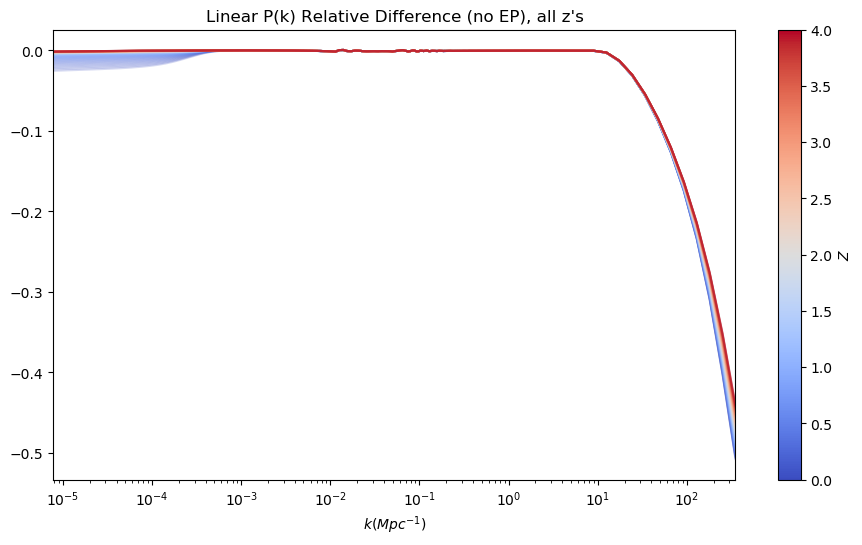

In [88]:
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=df_ccl_no_ep_lin_pk.columns[0],
                                              vmax=df_ccl_no_ep_lin_pk.columns[-1]))
((df_cosmosis_no_ep_lin_pk - df_ccl_no_ep_lin_pk)/df_ccl_no_ep_lin_pk)\
    .plot(alpha=0.2, legend=False, logx=True, ax=ax, colormap="coolwarm")
plt.title("Linear P(k) Relative Difference (no EP), all z's")
fig.subplots_adjust(bottom=0.13)
plt.colorbar(sm, label=r'$Z$')
plt.show()

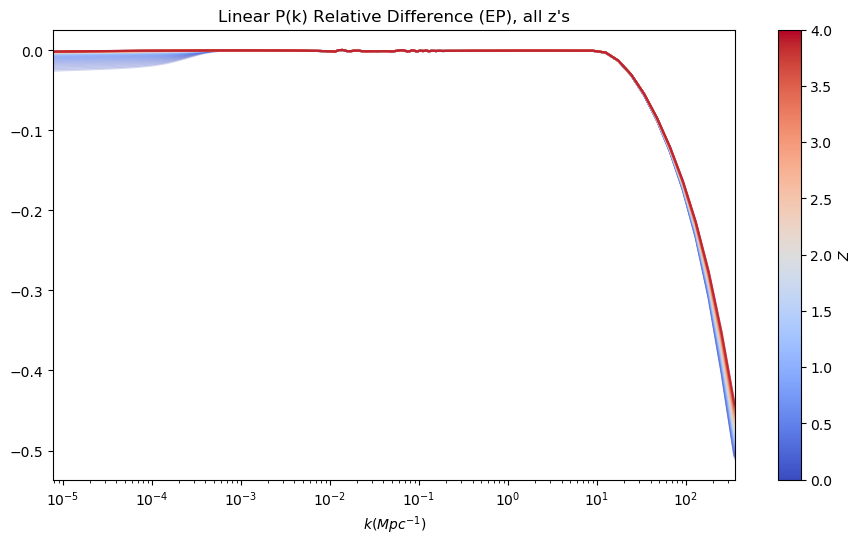

In [87]:
fig, ax = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=df_ccl_ep_lin_pk.columns[0],
                                              vmax=df_ccl_ep_lin_pk.columns[-1]))
((df_cosmosis_ep_lin_pk - df_ccl_ep_lin_pk)/df_ccl_ep_lin_pk)\
    .plot(alpha=0.2, legend=False, colormap="coolwarm", logx=True, ax=ax)
plt.title("Linear P(k) Relative Difference (EP), all z's")
fig.subplots_adjust(bottom=0.13)
plt.colorbar(sm, label=r'$Z$')
plt.show()

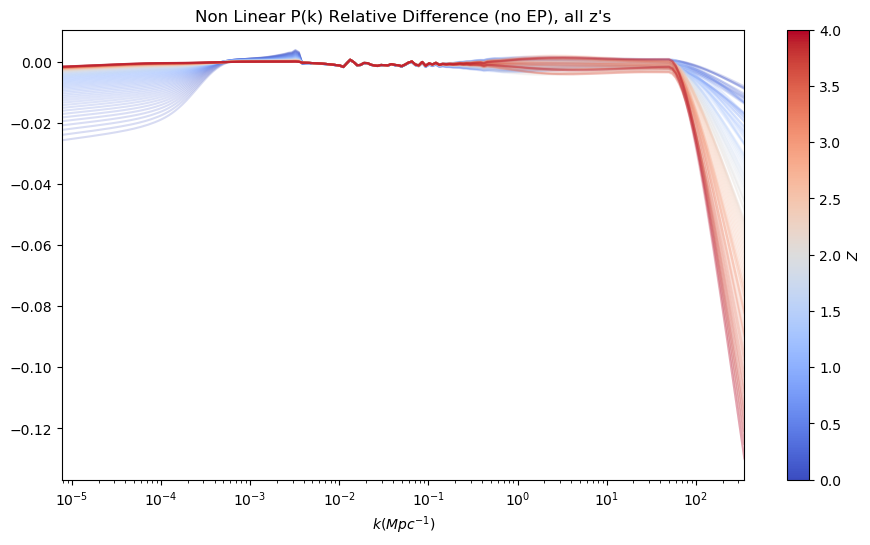

In [89]:
fig, ax5 = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=df_ccl_no_ep_nl_pk.columns[0],
                                              vmax=df_ccl_no_ep_nl_pk.columns[-1]))
((df_cosmosis_no_ep_nl_pk - df_ccl_no_ep_nl_pk)/df_ccl_no_ep_nl_pk)\
    .plot(alpha=0.2, legend=False, colormap="coolwarm", logx=True, ax=ax5)
plt.title("Non Linear P(k) Relative Difference (no EP), all z's")
plt.colorbar(sm, label=r'$Z$')
fig.subplots_adjust(bottom=0.13)
plt.show()

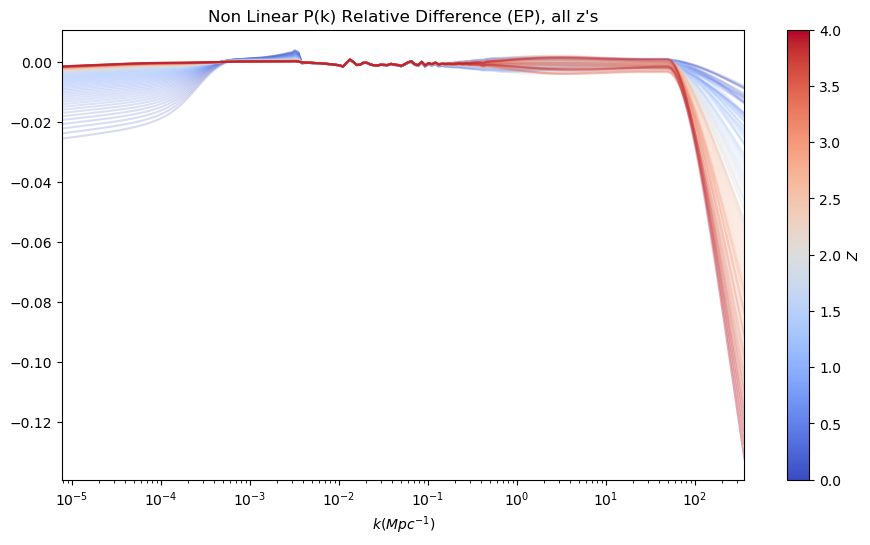

In [92]:
fig, ax5 = plt.subplots(figsize=(11,6), dpi=100)
sm = plt.cm.ScalarMappable(cmap="coolwarm", 
                           norm=plt.Normalize(vmin=df_ccl_ep_nl_pk.columns[0],
                                              vmax=df_ccl_ep_nl_pk.columns[-1]))
((df_cosmosis_ep_nl_pk - df_ccl_ep_nl_pk)/df_ccl_ep_nl_pk)\
    .plot(alpha=0.2, legend=False, colormap="coolwarm", logx=True, ax=ax5)
plt.title("Non Linear P(k) Relative Difference (EP), all z's")
fig.subplots_adjust(bottom=0.13)
plt.colorbar(sm, label=r'$Z$')
plt.show()

In [ ]:
# zoom in on linear pk

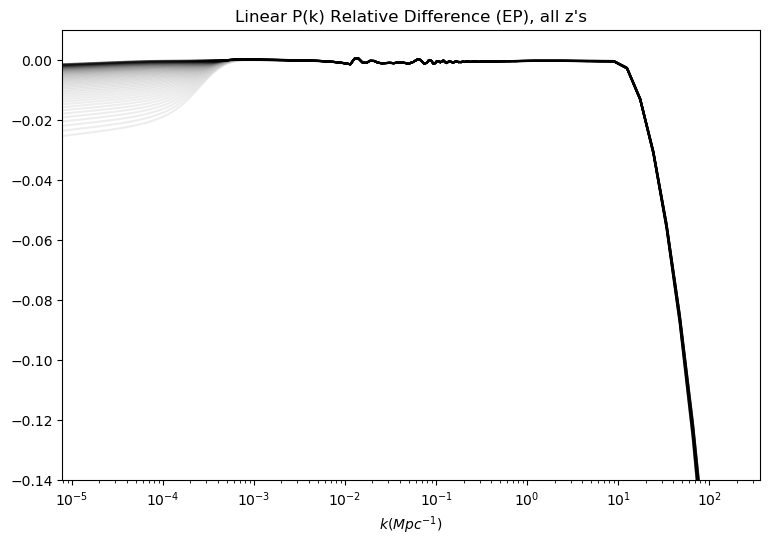

In [32]:
fig, ax = plt.subplots(figsize=(9,6), dpi=100)
# fig.canvas.layout.width = '80%'
# fig.canvas.layout.height = '450px'
((df_cosmosis_ep_lin_pk - df_ccl_ep_lin_pk)/df_ccl_ep_lin_pk)\
    .plot(alpha=0.07, legend=False, color="black", logx=True, ax=ax)
plt.title("Linear P(k) Relative Difference (EP), all z's")
plt.ylim(-0.14, 0.01)
fig.subplots_adjust(bottom=0.13)
plt.show()

In [93]:
dndz = np.loadtxt("tomo_lensing.dat")

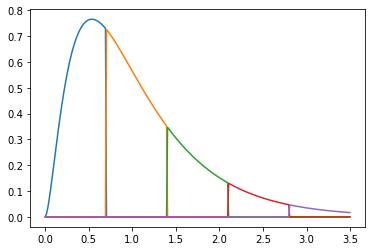

In [95]:
for i in range(1, 6):
    plt.plot(dndz[:, 0], dndz[:, i])